In [61]:
# importing useful libraries for data visualization and data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [62]:
# Reading data into dataframe
df=pd.read_csv('Fraud.csv')

In [63]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Dataset Description

### Columns

1. **step**: Maps a unit of time in the real world. In this case, 1 step represents 1 hour of time. The total number of steps is 744, indicating a 30-day simulation.

2. **type**: Describes the type of transaction, including CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.

3. **amount**: Represents the amount of the transaction in the local currency.

4. **nameOrig**: Identifies the customer who initiated the transaction.

5. **oldbalanceOrg**: Indicates the initial balance of the originator's account before the transaction.

6. **newbalanceOrig**: Represents the new balance of the originator's account after the transaction.

7. **nameDest**: Specifies the customer who is the recipient of the transaction.

8. **oldbalanceDest**: Represents the initial balance of the recipient's account before the transaction. Note that there is no information for customers starting with 'M' (Merchants).

9. **newbalanceDest**: Represents the new balance of the recipient's account after the transaction. Note that there is no information for customers starting with 'M' (Merchants).

10. **isFraud**: Indicates whether the transaction is fraudulent. Fraudulent behavior in this dataset involves attempts by agents to profit by taking control of customers' accounts and trying to empty the funds through transfers to another account and subsequent cashing out.

11. **isFlaggedFraud**: Flags illegal attempts to control massive transfers from one account to another. In this dataset, an illegal attempt is defined as an attempt to transfer more than 200,000 in a single transaction.

### Summary

This dataset is focused on simulating financial transactions over a 30-day period, with an emphasis on detec
single transaction.


In [64]:
#Describe data for better understanding of dataset
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Data Preparation

- The Data does not have any missing values and hence, need not be handled.
- The Data has Target Variable isFraud and isFlaggedFraud as the categorical variables.
- The mean of the amount of money in transactions is 1.798619e+05	
- The standard deviation of amount of money in transactions is 6.038582e+05
- The time is distributed throughout the data equitably and hence, serves as an independent feature

In [65]:
#identify which are the columns in dataset
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [66]:
# Check for missing values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

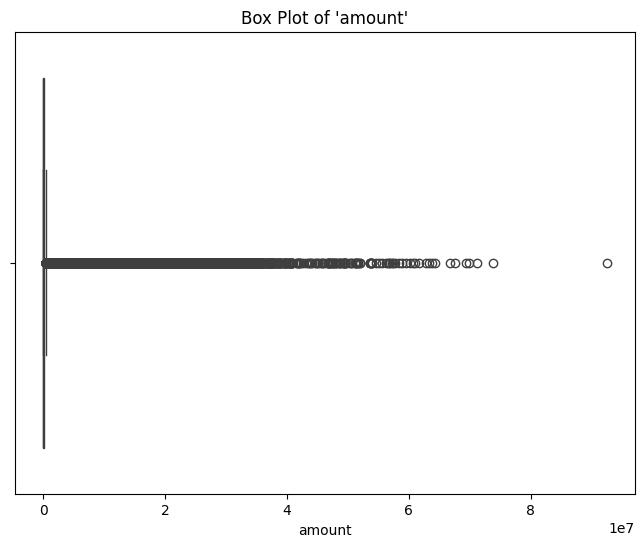

In [67]:
#As there are no missing value we now look for ouliers by plotting box plot for column amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['amount'])
plt.title("Box Plot of 'amount'")
plt.show()

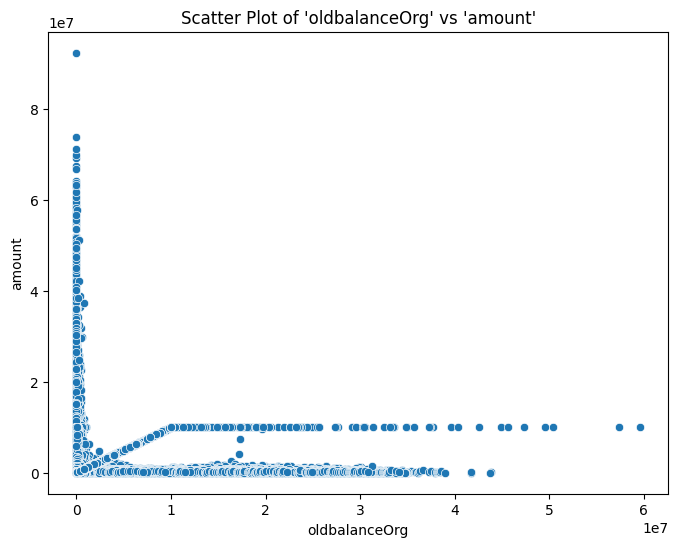

In [68]:
# Scatter plot for 'oldbalanceOrg' and 'amount'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df)
plt.title("Scatter Plot of 'oldbalanceOrg' vs 'amount'")
plt.show()

In [69]:
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target, height=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()

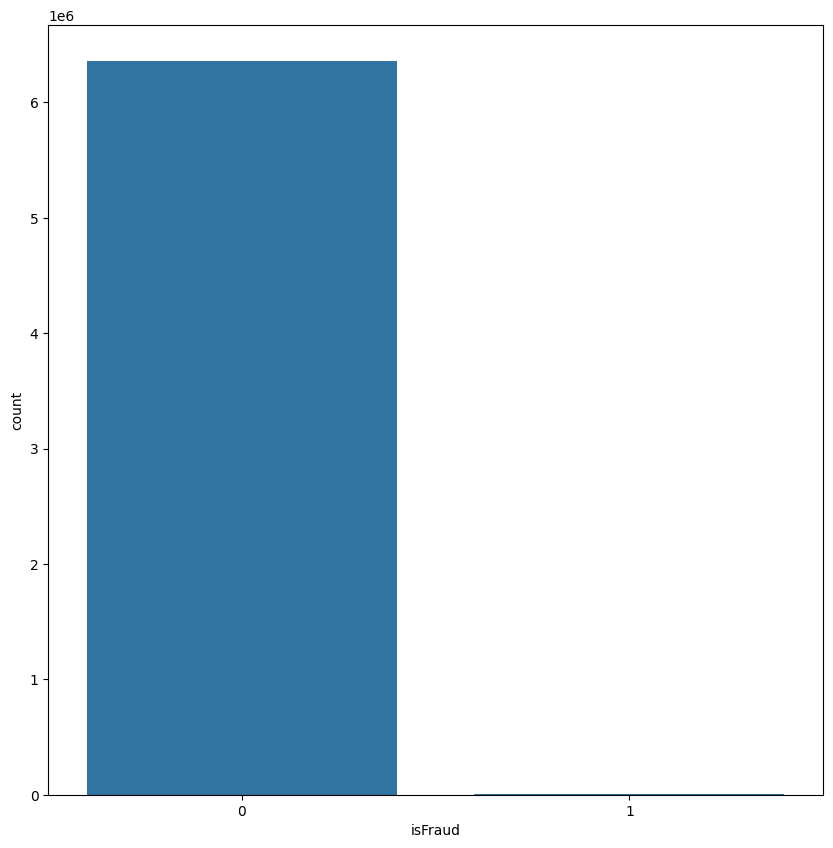

In [70]:
countplot_data(df, df.isFraud)

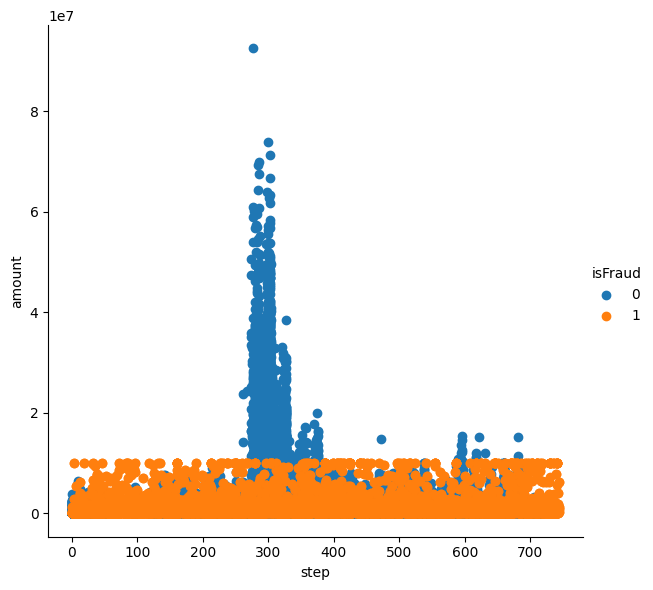

In [71]:
pairplot_data_grid(df, "step", "amount", "isFraud")

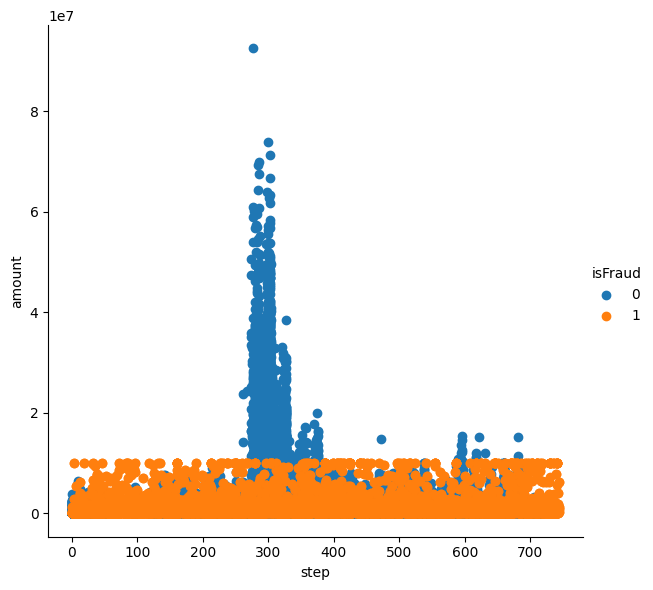

In [72]:
pairplot_data_grid(df, "step", "amount", "isFraud")

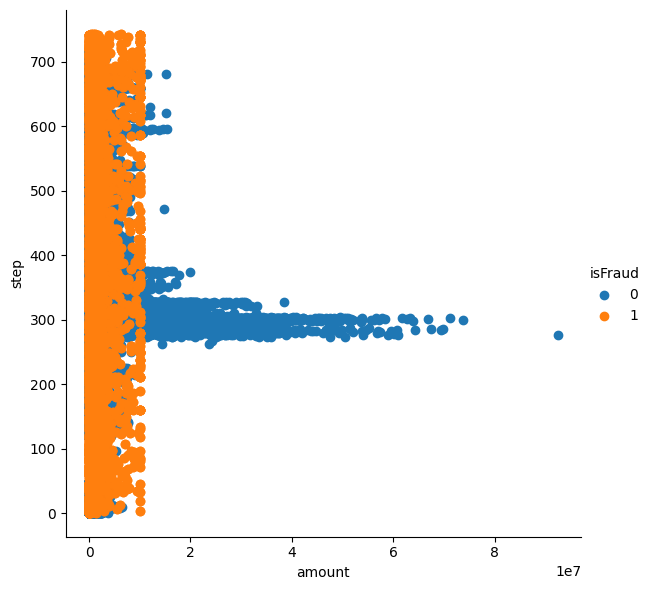

In [73]:
pairplot_data_grid(df, "amount", "step", "isFraud")

### Insights:
- Outliers has been tested by box plot and most of high transactions were not fraud so we did not remove it.
- The Dataset is highly imbalanced as evident from the countplot with majoritarian class label '0' and minority class label '1'
- It can also be observed that the fraud transactions are evenly distributed about time.

<Axes: >

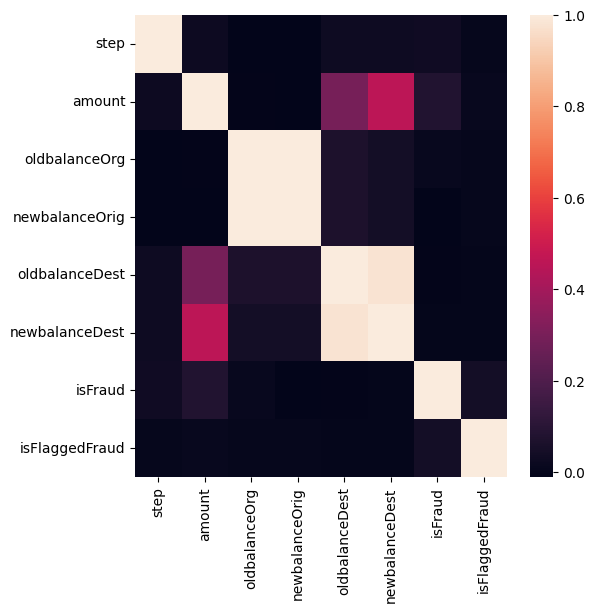

In [74]:
plt.figure(figsize=(6,6))
numeric_df = df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]
df_corr = numeric_df.corr()
sns.heatmap(df_corr)

### Modelling
- Study the Feature Correlations of the given data
- Plot a Heatmap
- Run GridSearch on the Data

In [75]:
# Find the maximum value in the 'amount' column
max_amount = df['amount'].max()
# Print the maximum value
print("Maximum value in the 'amount' column:", max_amount)

Maximum value in the 'amount' column: 92445516.64


In [76]:
# Find the row with the maximum value in the 'amount' column
max_amount_row = df[df['amount'] == df['amount'].max()]

# Check if the corresponding transaction is fraudulent
is_fraudulent = max_amount_row['isFraud'].values[0]

print("Is the transaction with the maximum amount fraudulent?", is_fraudulent)

Is the transaction with the maximum amount fraudulent? 0


In [77]:
# Find the top 100000 transactions with the highest amounts
top_hundred_transactions = df.nlargest(100000, 'amount')

# Check if each of the top 100000 transactions is fraudulent
fraud_status_top_hundred = top_hundred_transactions['isFraud']

print("Fraud status for the top 100000 transactions:")
print(fraud_status_top_hundred.value_counts())

Fraud status for the top 100000 transactions:
isFraud
0    97595
1     2405
Name: count, dtype: int64


In [78]:
# Filter transactions where 'nameDest' starts with 'M'
m_name_dest_transactions = df[df['nameDest'].str.startswith('M')]

# Check the 'isFraud' status for these transactions
fraud_status_m_name_dest = m_name_dest_transactions['isFraud']

print("Fraud status for transactions with 'nameDest' starting with 'M':")
print(fraud_status_m_name_dest.value_counts())

Fraud status for transactions with 'nameDest' starting with 'M':
isFraud
0    2151495
Name: count, dtype: int64


## Variable Selection
- Drop step because fraud is uniformly distributed over time.
- Drop nameOrig because fraud is not depend om it.
- Drop isFlaggedFraud is for tranfer of higher amount and fraud is not depend on if amount is transfer high or not

In [79]:
df = df.drop(['step', 'nameOrig', 'isFlaggedFraud'], axis=1)

In [80]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = df.drop('isFraud', axis=1)  # Features (all columns except 'isFraud')
y = df['isFraud']  # Target variable

# Split the data into training and testing sets
# Adjust the test_size parameter to set the proportion of the dataset for testing (e.g., test_size=0.3 for an 70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (4453834, 7) (4453834,)
Testing set shape (X_test, y_test): (1908786, 7) (1908786,)


In [81]:
# Perform column splitting on training set
X_train['nameDest_first_letter'] = X_train['nameDest'].astype(str).str[0]

# Perform column splitting on testing set
X_test['nameDest_first_letter'] = X_test['nameDest'].astype(str).str[0]

In [101]:
from sklearn.preprocessing import OneHotEncoder

# Assuming X_train and X_test are your training and testing features DataFrames

# Identify categorical columns 
categorical_columns = ['type','nameDest_first_letter']

# Extract the categorical columns from both training and testing data
X_train_categorical = X_train[categorical_columns]
X_test_categorical = X_test[categorical_columns]

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(drop=None)

# Fit and transform the categorical columns on the training data
X_train_encoded = onehot_encoder.fit_transform(X_train_categorical)

# Transform the testing data using the same encoder
X_test_encoded = onehot_encoder.transform(X_test_categorical)

# Convert the encoded arrays back to DataFrames
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(categorical_columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(categorical_columns))
X1_train = pd.concat([X_train.reset_index(), X_train_encoded_df.reset_index()], axis=1)
X1_train = X1_train.drop(['type','nameDest','nameDest_first_letter'], axis=1)
X1_test = pd.concat([X_test.reset_index(), X_test_encoded_df.reset_index()], axis=1)
X1_test = X1_test.drop(['type','nameDest','nameDest_first_letter'], axis=1)

In [104]:
print("Before One-Hot Encoding:")
print(X_train.head())
print("\nAfter One-Hot Encoding:")
print(X_train_encoded_df.head())
print(X1_train.head())

Before One-Hot Encoding:
             type      amount  oldbalanceOrg  newbalanceOrig     nameDest  \
2408104   CASH_IN    26771.98       27521.00        54292.98  C1063361489   
662430   CASH_OUT   344879.65           0.00            0.00  C1423956695   
496595   TRANSFER  1862607.84           0.00            0.00  C2074118913   
5053741   PAYMENT    37739.35       66684.93        28945.58  M1029189176   
755621   CASH_OUT   376055.13       22501.00            0.00   C109054029   

         oldbalanceDest  newbalanceDest nameDest_first_letter  
2408104      7175503.03      7148731.05                     C  
662430       3731846.57      4076726.22                     C  
496595       3329828.01      4913631.27                     C  
5053741            0.00            0.00                     M  
755621        182350.43       558405.55                     C  

After One-Hot Encoding:
   type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  \
0           1.0            0

## Modeling 
- From observing data one can notice that in column nameDest name starting from M is not fraud.
- Name starting from C if type is transfer and if amount of transaction is equal to old balance and change in the account balance of receivers account is zero and the transaction is followed by cash out of same amount to another account,then both transactions are fraud.
- That's why DecisionTreeClassifier is use as it makes prediction based on decision tree.

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X_train_encoded_df and X_test_encoded_df are your one-hot encoded training and testing features
# and y_train, y_test are your training and testing labels

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X1_train, y_train)

# Make predictions on the testing data
y_pred = decision_tree.predict(X1_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9996924746933391
Confusion Matrix:
[[1906084     267]
 [    320    2115]]


## Conclusion
- Factors consider here does make sense beacuse if amount is transfer but it is not received by receiver, so the person might be checking the account balance and the same amount is cash out immediately to another account and sequence of events could be seen in all transactions.
- Increase the frequency and depth of transaction monitoring to quickly identify suspicious patterns or anomalies and implement real-time alert systems to notify relevant parties when potentially fraudulent transactions are detected.
- Analyze transaction data to identify patterns before and after the implementation of preventive measures. Look for a reduction in suspicious patterns and Collect feedback from users regarding the security measures. Positive feedback may indicate increased confidence in the security of their transactions.